# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [60]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
# Set the API base URL
weather_api_key = "e9ea7bcf2e3011fa6eeddf01f5833a8c"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | dapa
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | malango
Processing Record 6 of Set 1 | mana
Processing Record 7 of Set 1 | magnaga
Processing Record 8 of Set 1 | yanbu
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | dayton
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | isangel
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | okha
Processing Record 17 of Set 1 | veraval
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | campo maior
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | brookings
Processing Reco

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.44,66,98,10.72,PN,1690595686
1,ribeira grande,38.5167,-28.7000,22.65,91,11,0.89,PT,1690595687
2,dapa,9.7594,126.0531,26.67,78,100,3.76,PH,1690595687
3,ilulissat,69.2167,-51.1000,0.26,92,39,2.42,GL,1690595687
4,malango,-2.9627,119.9001,25.44,59,33,1.76,ID,1690595687


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.44,66,98,10.72,PN,1690595686
1,ribeira grande,38.5167,-28.7000,22.65,91,11,0.89,PT,1690595687
2,dapa,9.7594,126.0531,26.67,78,100,3.76,PH,1690595687
3,ilulissat,69.2167,-51.1000,0.26,92,39,2.42,GL,1690595687
4,malango,-2.9627,119.9001,25.44,59,33,1.76,ID,1690595687


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

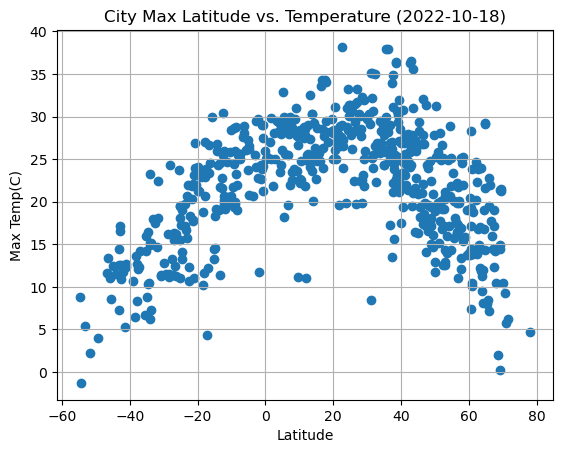

In [66]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

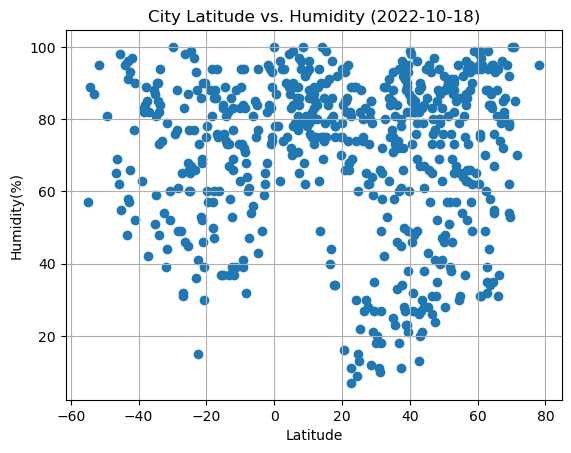

In [67]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

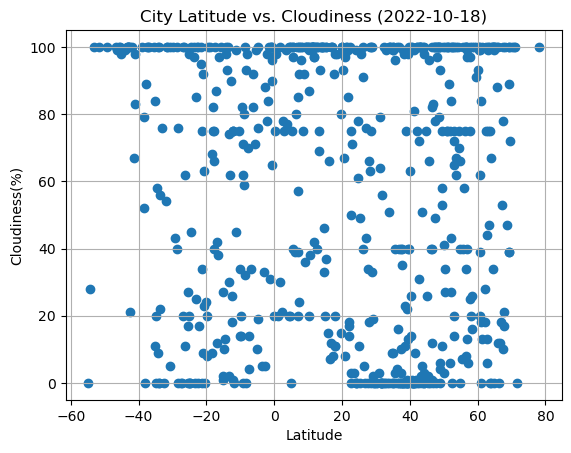

In [68]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

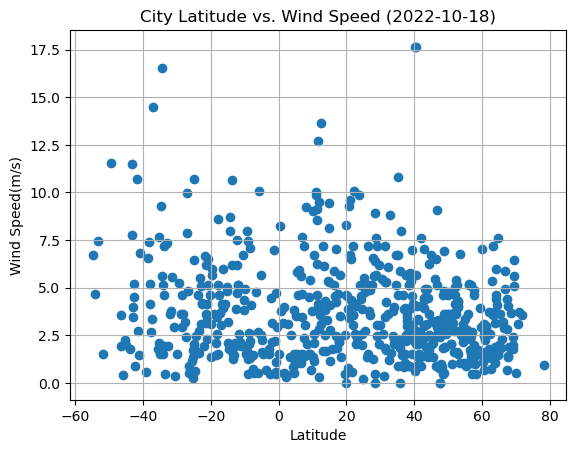

In [69]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Convert input data to NumPy arrays
    x = np.array(x_values)
    y = np.array(y_values)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, marker="o", edgecolors="black", label="Data")
    plt.plot(x, y, color="red", label="Linear Regression")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    plt.show()








In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,22.65,91,11,0.89,PT,1690595687
2,dapa,9.7594,126.0531,26.67,78,100,3.76,PH,1690595687
3,ilulissat,69.2167,-51.1000,0.26,92,39,2.42,GL,1690595687
5,mana,5.6592,-53.7767,25.62,90,97,4.61,GF,1690595688
6,magnaga,7.1694,125.8931,29.99,86,100,1.36,PH,1690595688


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.44,66,98,10.72,PN,1690595686
4,malango,-2.9627,119.9001,25.44,59,33,1.76,ID,1690595687
8,mount isa,-20.7333,139.5000,26.87,39,63,5.14,AU,1690595688
11,isangel,-19.5500,169.2667,21.27,57,100,5.64,VU,1690595689
12,ushuaia,-54.8000,-68.3000,8.81,57,0,6.69,AR,1690595689


###  Temperature vs. Latitude Linear Regression Plot

r_value:-0.5842861510725588


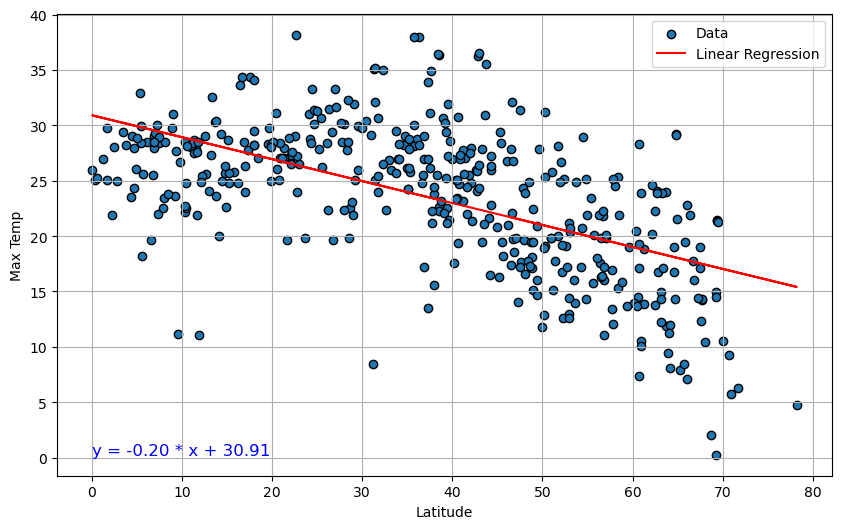

In [73]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')



print(f"r_value:{r_value}")
plt.show()



r_value:0.7616863871698424


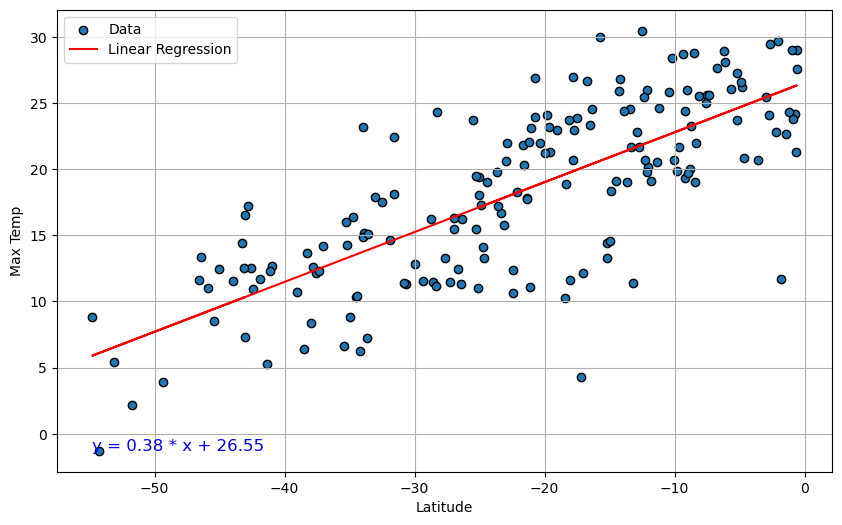

In [74]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')



print(f"r_value:{r_value}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r_value:-0.08333320800697326


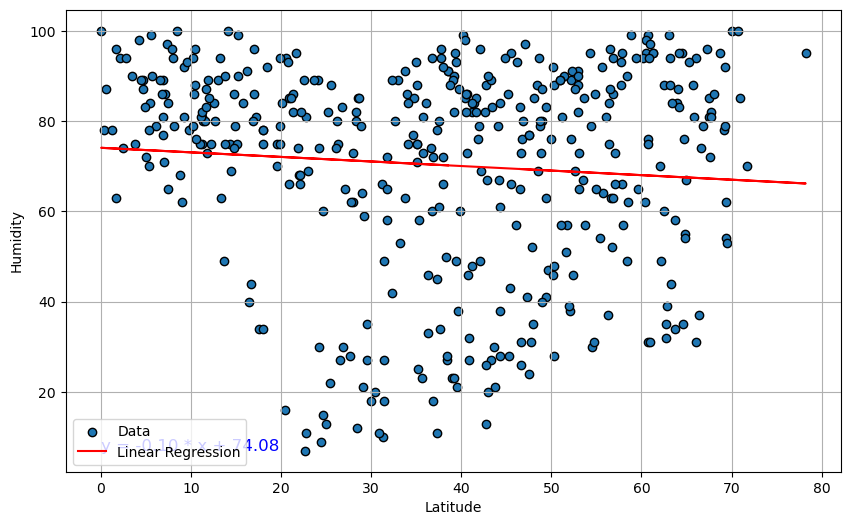

In [75]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')


print(f"r_value:{r_value}")
plt.show()




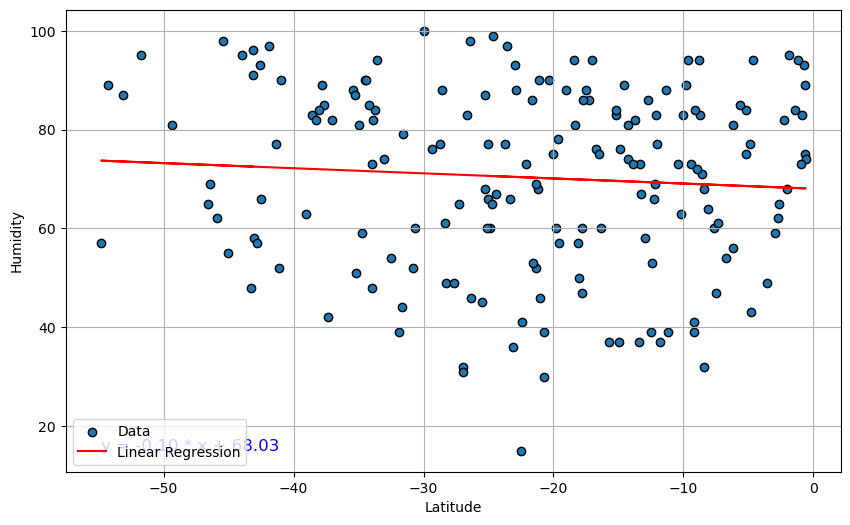

r_value:-0.07537835734622779


In [76]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')



plt.show()
print(f"r_value:{r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r_value:-0.06448756992712588


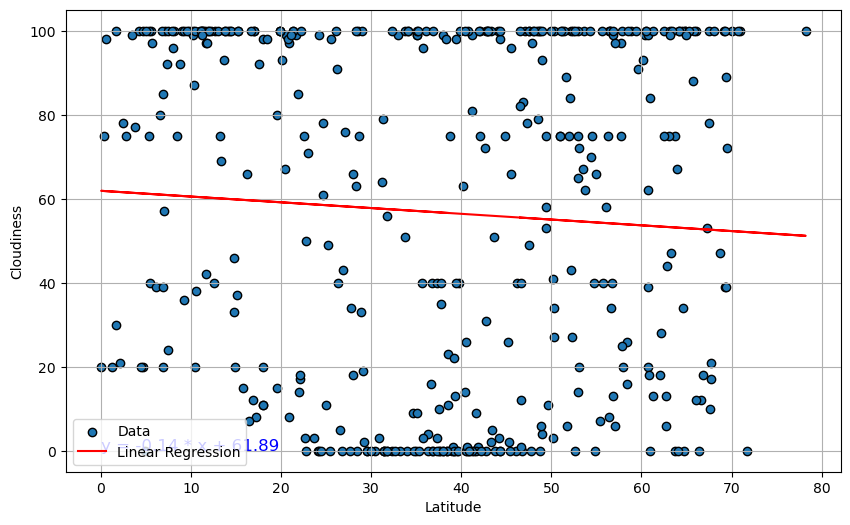

In [77]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')


print(f"r_value:{r_value}")
plt.show()

r_value:-0.11721988967184342


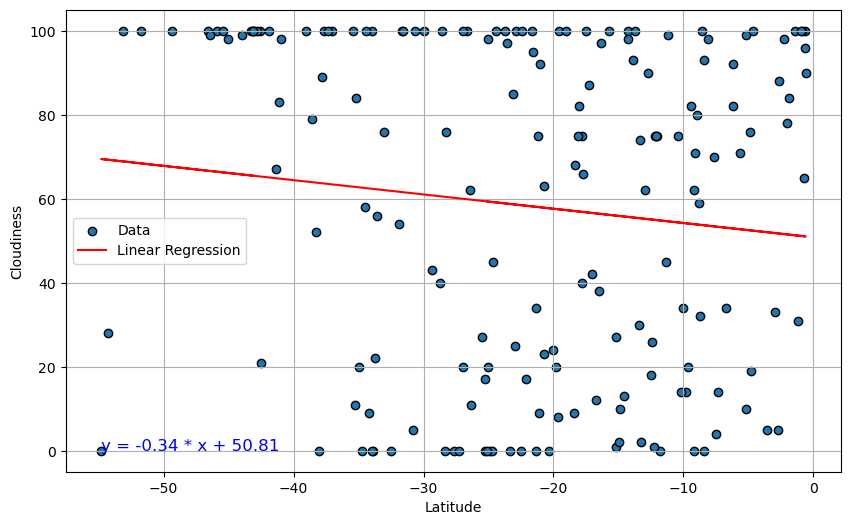

In [78]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')


print(f"r_value:{r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r_value:-0.17075560720580982


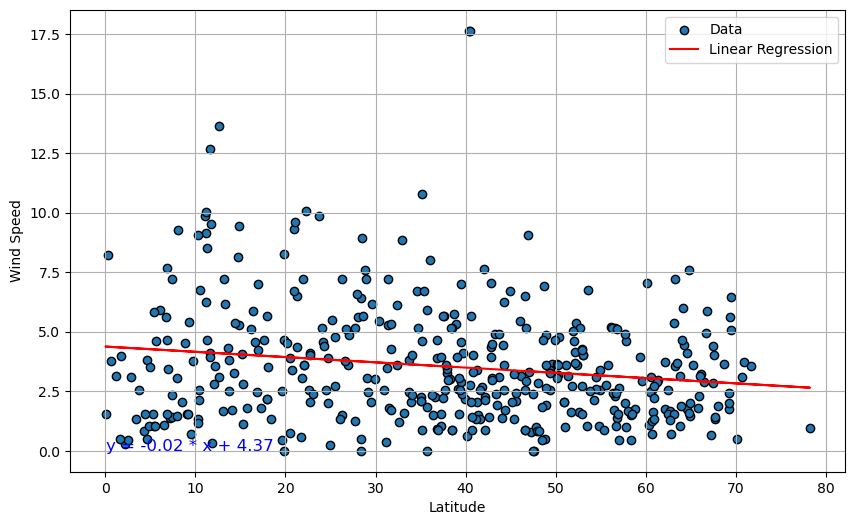

In [79]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')


print(f"r_value:{r_value}")
plt.show()

r_value:-0.21331354439567504


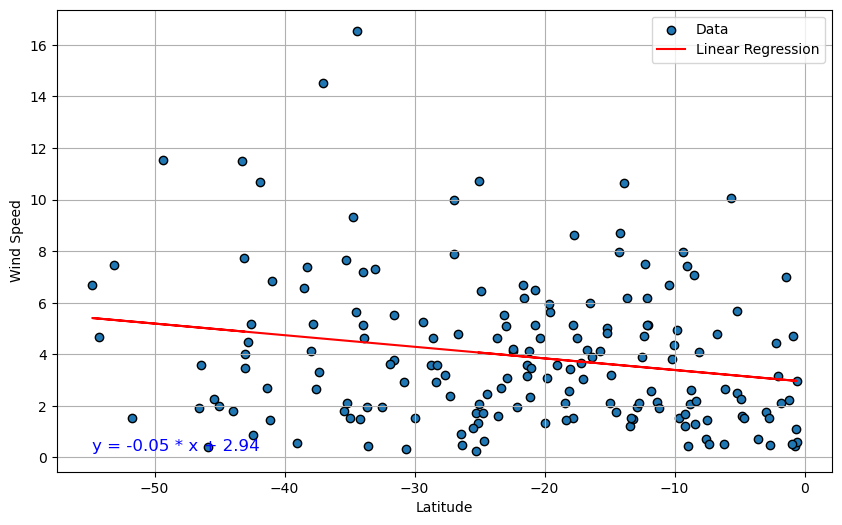

In [80]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression using scipy's linregress function
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept

# Create the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker="o", edgecolors="black", label="Data")
plt.plot(x_values, regression_line, color="red", label="Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.legend()
plt.grid(True)

# Add the equation to the plot
equation = f'y = {slope:.2f} * x + {intercept:.2f}'
plt.text(x_values.min(), y_values.min(), equation, fontsize=12, color='blue')


print(f"r_value:{r_value}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE